In [9]:
# https://machinelearningmastery.com/sequence-classification-lstm-recurrent-neural-networks-python-keras/
import json
import numpy as np
from keras.models import Sequential
from keras.layers import Input
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.preprocessing import sequence
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from matplotlib import pyplot

In [2]:
# load dataset
filename = 'text_and_label_all/json_w2v.json'

max_len = 0

X = []
y = []
with open(filename) as json_file:
    data = json.load(json_file)
    
    for key, value in data.items():
        X.append(value["vectorized"])
        y.append(value["label"])
        
        max_len = max(max_len, len(value["vectorized"]))

X = np.array(X)
y = np.array(y)

# X = X[:,np.newaxis]
# y = y[:,np.newaxis]
        
y = to_categorical(y, num_classes=5)
# y = np.expand_dims(y, axis=2)
        
print(X[0])
print(y[0])
print(max_len)

[[0.06982421875, -0.037841796875, -0.0400390625, 0.051513671875, 0.038330078125, -0.16796875, 0.08154296875, -0.00579833984375, 0.1123046875, 0.201171875, -0.16796875, -0.1962890625, -0.11279296875, 0.08984375, -0.06591796875, 0.28515625, 0.0849609375, -0.09521484375, -0.2138671875, -0.05419921875, -0.208984375, -0.119140625, -0.0263671875, 0.01385498046875, 0.028076171875, -0.26171875, -0.1123046875, -0.1435546875, -0.04345703125, 0.2890625, 0.05078125, -0.28515625, -0.208984375, 0.26953125, -0.025390625, -0.059814453125, 0.15625, -0.09619140625, -0.1435546875, 0.0059814453125, 0.078125, 0.06298828125, 0.06396484375, 0.00677490234375, 0.1171875, -0.169921875, -0.021728515625, 0.018798828125, -0.0211181640625, -0.01611328125, -0.1953125, -0.00933837890625, -0.0096435546875, 0.1572265625, -0.10595703125, -0.056640625, 0.0245361328125, 0.103515625, -0.053955078125, -0.047119140625, -0.0159912109375, 0.05615234375, 0.054931640625, -0.2890625, 0.046142578125, -0.06591796875, -0.02331542968

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [7]:
# truncate and pad input sequences
input_len = 100
X_train = sequence.pad_sequences(X_train, maxlen=input_len, truncating='post')
X_test = sequence.pad_sequences(X_test, maxlen=input_len, truncating='post')

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(11447, 100, 300) (11447, 5)
(2862, 100, 300) (2862, 5)


In [14]:
# create the model
embedding_vecor_length = 8
model = Sequential()
model.add(LSTM(16, input_shape=(input_len, 300)))
model.add(Dense(5, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 16)                20288     
_________________________________________________________________
dense_2 (Dense)              (None, 5)                 85        
Total params: 20,373
Trainable params: 20,373
Non-trainable params: 0
_________________________________________________________________
None


In [15]:
history = model.fit(X_train, y_train, epochs=5, batch_size=16, validation_data=(X_test, y_test))
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Train on 11447 samples, validate on 2862 samples
Epoch 1/5
11447/11447 [==============================] - 57s 5ms/step - loss: 1.4763 - acc: 0.2657 - val_loss: 1.4641 - val_acc: 0.2795
Epoch 2/5
11447/11447 [==============================] - 57s 5ms/step - loss: 1.4671 - acc: 0.2802 - val_loss: 1.4646 - val_acc: 0.2795
Epoch 3/5
11447/11447 [==============================] - 56s 5ms/step - loss: 1.4667 - acc: 0.2739 - val_loss: 1.4677 - val_acc: 0.2683
Epoch 4/5
11447/11447 [==============================] - 57s 5ms/step - loss: 1.4663 - acc: 0.2742 - val_loss: 1.4635 - val_acc: 0.2795
Epoch 5/5
11447/11447 [==============================] - 57s 5ms/step - loss: 1.4660 - acc: 0.2734 - val_loss: 1.4636 - val_acc: 0.2795
Accuracy: 27.95%


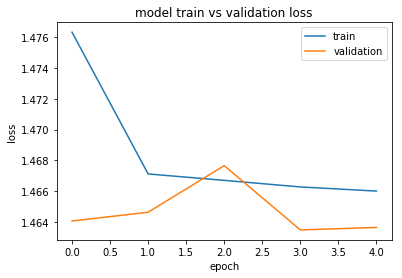

In [16]:
pyplot.plot(history.history['loss'])
pyplot.plot(history.history['val_loss'])
pyplot.title('model train vs validation loss')
pyplot.ylabel('loss')
pyplot.xlabel('epoch')
pyplot.legend(['train', 'validation'], loc='upper right')
pyplot.show()

In [20]:
# create the model
embedding_vecor_length = 8
model = Sequential()
# model.add(Embedding(top_words, embedding_vecor_length, input_length=input_len))
model.add(Conv1D(filters=2, kernel_size=3, input_shape=(input_len, 300), padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(LSTM(100))
model.add(Dense(5, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_2 (Conv1D)            (None, 100, 2)            1802      
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 50, 2)             0         
_________________________________________________________________
lstm_4 (LSTM)                (None, 100)               41200     
_________________________________________________________________
dense_4 (Dense)              (None, 5)                 505       
Total params: 43,507
Trainable params: 43,507
Non-trainable params: 0
_________________________________________________________________
None


In [23]:
history2 = model.fit(X_train, y_train, epochs=10, batch_size=16, validation_data=(X_test, y_test))
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Train on 11447 samples, validate on 2862 samples
Epoch 1/10
11447/11447 [==============================] - 32s 3ms/step - loss: 1.4661 - acc: 0.2780 - val_loss: 1.4656 - val_acc: 0.2683
Epoch 2/10
11447/11447 [==============================] - 32s 3ms/step - loss: 1.4667 - acc: 0.2750 - val_loss: 1.4634 - val_acc: 0.2802
Epoch 3/10
11447/11447 [==============================] - 32s 3ms/step - loss: 1.4660 - acc: 0.2736 - val_loss: 1.4656 - val_acc: 0.2795
Epoch 4/10
11447/11447 [==============================] - 32s 3ms/step - loss: 1.4660 - acc: 0.2706 - val_loss: 1.4659 - val_acc: 0.2683
Epoch 5/10
11447/11447 [==============================] - 33s 3ms/step - loss: 1.4664 - acc: 0.2704 - val_loss: 1.4636 - val_acc: 0.2802
Epoch 6/10
11447/11447 [==============================] - 32s 3ms/step - loss: 1.4652 - acc: 0.2713 - val_loss: 1.4668 - val_acc: 0.2212
Epoch 7/10
11447/11447 [==============================] - 32s 3ms/step - loss: 1.4661 - acc: 0.2747 - val_loss: 1.4635 - val_acc:

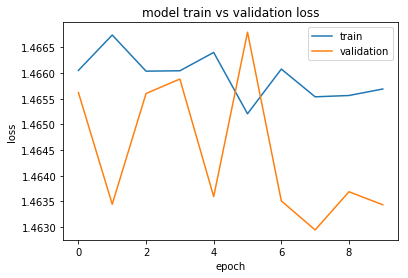

In [24]:
pyplot.plot(history2.history['loss'])
pyplot.plot(history2.history['val_loss'])
pyplot.title('model train vs validation loss')
pyplot.ylabel('loss')
pyplot.xlabel('epoch')
pyplot.legend(['train', 'validation'], loc='upper right')
pyplot.show()

In [13]:
# serialize model to JSON
model_json = model.to_json()
with open("models/conv_lstm_model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("models/conv_lstm_model.h5")
print("Saved model to disk")

Saved model to disk
